In [1]:
import pandas as pd
from sklearn.datasets import load_boston

### Load Data

In [2]:
boston_dataset = load_boston()

### EDA

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
boston_dataset_X = boston_dataset['data']
boston_dataset_Y = boston_dataset['target']
boston_dataset_X_names = boston_dataset['feature_names']
boston_dataset_X_desc = boston_dataset['DESCR']

In [6]:
print(boston_dataset_X_desc)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
def get_df_info(df, include_unique_values=False):
    col_name_list = list(df.columns)
    col_type_list = [type(df[col][0]) for col in col_name_list]
    col_null_count_list = [df[col].isnull().sum() for col in col_name_list]
    col_unique_count_list = [df[col].nunique() for col in col_name_list]
    col_memory_usage_list = [df[col].memory_usage(deep=True) for col in col_name_list]
    df_total_memory_usage = sum(col_memory_usage_list) / 1048576
    if include_unique_values:
        col_unique_list = [df[col].unique() for col in col_name_list]
        df_info = pd.DataFrame({'column_name': col_name_list, 'type': col_type_list, 
                                'null_count': col_null_count_list, 'nunique': col_unique_count_list, 
                                'unique_values': col_unique_list})
    else:
        df_info = pd.DataFrame({'column_name': col_name_list, 'type': col_type_list, 
                                'null_count': col_null_count_list, 'nunique': col_unique_count_list})
    return df_info, df_total_memory_usage

In [8]:
df_boston_raw_data = pd.DataFrame(boston_dataset_X, columns=boston_dataset_X_names)
df_boston_raw_data['MEDV'] = boston_dataset_Y
df_boston_raw_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df_boston_raw_data_info, df_boston_raw_data_mem_usage = get_df_info(df_boston_raw_data, True)
df_boston_raw_data_info

,column_name,type,null_count,nunique,unique_values
0,CRIM,<class 'numpy.float64'>,0,504,"[0.00632, 0.02731, 0.02729, 0.03237, 0.06905, ..."
1,ZN,<class 'numpy.float64'>,0,26,"[18.0, 0.0, 12.5, 75.0, 21.0, 90.0, 85.0, 100...."
2,INDUS,<class 'numpy.float64'>,0,76,"[2.31, 7.07, 2.18, 7.87, 8.14, 5.96, 2.95, 6.9..."
3,CHAS,<class 'numpy.float64'>,0,2,"[0.0, 1.0]"
4,NOX,<class 'numpy.float64'>,0,81,"[0.538, 0.469, 0.458, 0.524, 0.499, 0.428, 0.4..."
5,RM,<class 'numpy.float64'>,0,446,"[6.575, 6.421, 7.185, 6.998, 7.147, 6.43, 6.01..."
6,AGE,<class 'numpy.float64'>,0,356,"[65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96...."
7,DIS,<class 'numpy.float64'>,0,412,"[4.09, 4.9671, 6.0622, 5.5605, 5.9505, 6.0821,..."
8,RAD,<class 'numpy.float64'>,0,9,"[1.0, 2.0, 3.0, 5.0, 4.0, 8.0, 6.0, 7.0, 24.0]"
9,TAX,<class 'numpy.float64'>,0,66,"[296.0, 242.0, 222.0, 311.0, 307.0, 279.0, 252..."


In [10]:
df_boston_raw_data_mem_usage

0.055755615234375

In [11]:
import numpy as np

In [12]:
df_boston_raw_data.CHAS = df_boston_raw_data.CHAS.astype(np.int8)
df_boston_raw_data.RAD = df_boston_raw_data.RAD.astype(np.int8)

In [13]:
df_boston_raw_data.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


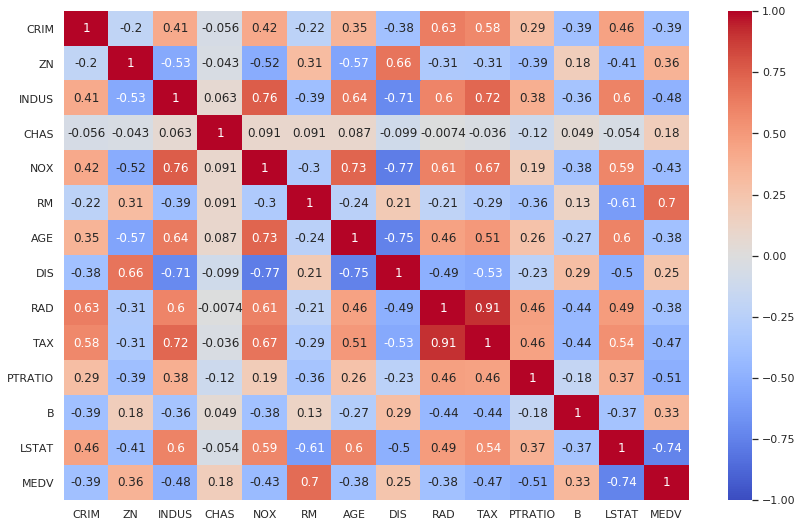

In [14]:
import seaborn as sb
sb.set(rc={'figure.figsize': (14, 9)})
sb.heatmap(df_boston_raw_data.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

### Create Models and Evaluate

In [15]:
def show_model_eval_table(model_attrib):
    df_model_eval = pd.DataFrame({'model': model_attrib['model_names'], 'feature_count': model_attrib['model_feature_counts'], 
                                  'feature_names': model_attrib['model_feature_names'], 'r2': model_attrib['model_r2_scores'], 
                                  'mae': model_attrib['model_mae_scores']})
    return df_model_eval.round(2)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error

#### Creating X1 with all 13 features

In [18]:
X1_train, X1_test, y_train, y_test = train_test_split(df_boston_raw_data.iloc[:, :-1], df_boston_raw_data.MEDV, random_state=0)
print(X1_train.shape, y_train.shape)
print(X1_test.shape, y_test.shape)

(379, 13) (379,)
(127, 13) (127,)


#### Creating X2 by dropping 'CHAS' as it has the lowest corr with y

In [19]:
X2_train = X1_train.drop(columns=['CHAS'])
X2_test = X1_test.drop(columns=['CHAS'])
print(X2_train.shape, y_train.shape)
print(X2_test.shape, y_test.shape)

(379, 12) (379,)
(127, 12) (127,)


#### Creating X1S with all 13 features scaled using StandardScaler

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
std_scaler = StandardScaler()
X1S = std_scaler.fit_transform(df_boston_raw_data.iloc[:, :-1].values)

In [22]:
X1S = pd.DataFrame(X1S, columns=boston_dataset_X_names)
X1S.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [23]:
X1S.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.42,-0.49,-1.56,-0.27,-1.47,-3.88,-2.34,-1.27,-0.98,-1.31,-2.71,-3.91,-1.53
25%,-0.41,-0.49,-0.87,-0.27,-0.91,-0.57,-0.84,-0.81,-0.64,-0.77,-0.49,0.21,-0.80
50%,-0.39,-0.49,-0.21,-0.27,-0.14,-0.11,0.32,-0.28,-0.52,-0.46,0.27,0.38,-0.18
75%,0.01,0.05,1.02,-0.27,0.60,0.48,0.91,0.66,1.66,1.53,0.81,0.43,0.60
max,9.93,3.80,2.42,3.67,2.73,3.56,1.12,3.96,1.66,1.80,1.64,0.44,3.55


In [24]:
X1S_train, X1S_test = train_test_split(X1S, random_state=0)
print(X1S_train.shape, y_train.shape)
print(X1S_test.shape, y_test.shape)

(379, 13) (379,)
(127, 13) (127,)


#### Creating X1N with all 13 features scaled using Normalizer

In [25]:
from sklearn.preprocessing import Normalizer

In [26]:
normalizer = Normalizer()
X1N = normalizer.fit_transform(df_boston_raw_data.iloc[:, :-1].values)

In [27]:
X1N = pd.DataFrame(X1N, columns=boston_dataset_X_names)
X1N.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000013,0.035997,0.004620,0.0,0.001076,0.013149,0.130388,0.008179,0.002000,0.591945,0.030597,0.793727,0.009959
1,0.000058,0.000000,0.014977,0.0,0.000994,0.013602,0.167140,0.010522,0.004237,0.512648,0.037707,0.840785,0.019362
2,0.000059,0.000000,0.015174,0.0,0.001007,0.015421,0.131140,0.010661,0.004293,0.519409,0.038204,0.843138,0.008650
3,0.000071,0.000000,0.004785,0.0,0.001005,0.015360,0.100527,0.013306,0.006585,0.487268,0.041045,0.866174,0.006453
4,0.000151,0.000000,0.004755,0.0,0.000999,0.015587,0.118209,0.013222,0.006543,0.484177,0.040784,0.865631,0.011625


In [28]:
X1N.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.00,506.00,506.00,506.0,506.0,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,0.01,0.02,0.02,0.0,0.0,0.01,0.12,0.01,0.01,0.69,0.03,0.66,0.02
std,0.01,0.05,0.01,0.0,0.0,0.00,0.05,0.00,0.01,0.15,0.01,0.21,0.01
min,0.00,0.00,0.00,0.0,0.0,0.00,0.01,0.00,0.00,0.43,0.02,0.00,0.00
25%,0.00,0.00,0.01,0.0,0.0,0.01,0.09,0.00,0.01,0.58,0.03,0.51,0.01
50%,0.00,0.00,0.02,0.0,0.0,0.01,0.13,0.01,0.01,0.65,0.03,0.74,0.02
75%,0.01,0.02,0.02,0.0,0.0,0.01,0.16,0.01,0.03,0.85,0.04,0.81,0.03
max,0.11,0.21,0.06,0.0,0.0,0.02,0.24,0.03,0.04,0.99,0.05,0.89,0.07


In [29]:
X1N_train, X1N_test = train_test_split(X1N, random_state=0)
print(X1N_train.shape, y_train.shape)
print(X1N_test.shape, y_test.shape)

(379, 13) (379,)
(127, 13) (127,)


#### Creating X2S with 12 features scaled using StandardScaler

In [30]:
X2S_train = X1S_train.drop(columns=['CHAS'])
X2S_test = X1S_test.drop(columns=['CHAS'])

#### Creating X2N with 12 features scaled using Normalizer

In [31]:
X2N_train = X1N_train.drop(columns=['CHAS'])
X2N_test = X1N_test.drop(columns=['CHAS'])

In [32]:
model_attrib = {
    'model_names': [],
    'model_feature_counts': [],
    'model_feature_names': [],
    'model_r2_scores': [],
    'model_mae_scores': []
}

#### Model 1: LR with X1

In [33]:
lr_model_1 = LinearRegression()
lr_model_1.fit(X1_train, y_train)
lr_model_1_y_hat = lr_model_1.predict(X1_test)
model_attrib['model_names'].append('lr_model_1')
model_attrib['model_feature_counts'].append(X1_train.shape[1])
model_attrib['model_feature_names'].append(list(X1_train.columns))
model_attrib['model_r2_scores'].append(r2_score(y_test, lr_model_1_y_hat))
model_attrib['model_mae_scores'].append(mean_absolute_error(y_test, lr_model_1_y_hat))

In [34]:
df_actuals_vs_predicted = pd.DataFrame({'actual': y_test, 'predicted': lr_model_1_y_hat})
df_actuals_vs_predicted

,actual,predicted
329,22.6,24.952333
371,50.0,23.616997
219,23.0,29.205886
403,8.3,11.960705
78,21.2,21.333620
...,...,...
49,19.4,17.538048
498,21.2,21.502223
309,20.3,23.632813
124,18.8,20.282598


#### Model 2: RFR with X1

In [35]:
rf_model_1 = RandomForestRegressor(random_state=0)
rf_model_1.fit(X1_train, y_train)
rf_model_1_y_hat = rf_model_1.predict(X1_test)
model_attrib['model_names'].append('rf_model_1')
model_attrib['model_feature_counts'].append(X1_train.shape[1])
model_attrib['model_feature_names'].append(list(X1_train.columns))
model_attrib['model_r2_scores'].append(r2_score(y_test, rf_model_1_y_hat))
model_attrib['model_mae_scores'].append(mean_absolute_error(y_test, rf_model_1_y_hat))

#### Model 3: LR with X2

In [36]:
lr_model_2 = LinearRegression()
lr_model_2.fit(X2_train, y_train)
lr_model_2_y_hat = lr_model_2.predict(X2_test)
model_attrib['model_names'].append('lr_model_2')
model_attrib['model_feature_counts'].append(X2_train.shape[1])
model_attrib['model_feature_names'].append(list(X2_train.columns))
model_attrib['model_r2_scores'].append(r2_score(y_test, lr_model_2_y_hat))
model_attrib['model_mae_scores'].append(mean_absolute_error(y_test, lr_model_2_y_hat))

#### Model 4: RFR with X2

In [37]:
rf_model_2 = RandomForestRegressor(random_state=0)
rf_model_2.fit(X2_train, y_train)
rf_model_2_y_hat = rf_model_2.predict(X2_test)
model_attrib['model_names'].append('rf_model_2')
model_attrib['model_feature_counts'].append(X2_train.shape[1])
model_attrib['model_feature_names'].append(list(X2_train.columns))
model_attrib['model_r2_scores'].append(r2_score(y_test, rf_model_2_y_hat))
model_attrib['model_mae_scores'].append(mean_absolute_error(y_test, rf_model_2_y_hat))

#### Model 5: LR with X1S

In [38]:
lr_model_3 = LinearRegression()
lr_model_3.fit(X1S_train, y_train)
lr_model_3_y_hat = lr_model_3.predict(X1S_test)
model_attrib['model_names'].append('lr_model_3')
model_attrib['model_feature_counts'].append(X1S_train.shape[1])
model_attrib['model_feature_names'].append(list(X1S_train.columns))
model_attrib['model_r2_scores'].append(r2_score(y_test, lr_model_3_y_hat))
model_attrib['model_mae_scores'].append(mean_absolute_error(y_test, lr_model_3_y_hat))

#### Model 6: RFR with X1S

In [39]:
rf_model_3 = RandomForestRegressor(random_state=0)
rf_model_3.fit(X1S_train, y_train)
rf_model_3_y_hat = rf_model_3.predict(X1S_test)
model_attrib['model_names'].append('rf_model_3')
model_attrib['model_feature_counts'].append(X1S_train.shape[1])
model_attrib['model_feature_names'].append(list(X1S_train.columns))
model_attrib['model_r2_scores'].append(r2_score(y_test, rf_model_3_y_hat))
model_attrib['model_mae_scores'].append(mean_absolute_error(y_test, rf_model_3_y_hat))

In [40]:
show_model_eval_table(model_attrib)

,model,feature_count,feature_names,r2,mae
0,lr_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
1,rf_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.57
2,lr_model_2,12,"[CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,...",0.63,3.68
3,rf_model_2,12,"[CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,...",0.80,2.57
4,lr_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
5,rf_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.57


#### Model 7: LR with X2S

In [41]:
lr_model_4 = LinearRegression()
lr_model_4.fit(X2S_train, y_train)
lr_model_4_y_hat = lr_model_4.predict(X2S_test)
model_attrib['model_names'].append('lr_model_4')
model_attrib['model_feature_counts'].append(X2S_train.shape[1])
model_attrib['model_feature_names'].append(list(X2S_train.columns))
model_attrib['model_r2_scores'].append(r2_score(y_test, lr_model_4_y_hat))
model_attrib['model_mae_scores'].append(mean_absolute_error(y_test, lr_model_4_y_hat))

#### Model 8: RFR with X2S

In [42]:
rf_model_4 = RandomForestRegressor(random_state=0)
rf_model_4.fit(X2S_train, y_train)
rf_model_4_y_hat = rf_model_4.predict(X2S_test)
model_attrib['model_names'].append('rf_model_4')
model_attrib['model_feature_counts'].append(X2S_train.shape[1])
model_attrib['model_feature_names'].append(list(X2S_train.columns))
model_attrib['model_r2_scores'].append(r2_score(y_test, rf_model_4_y_hat))
model_attrib['model_mae_scores'].append(mean_absolute_error(y_test, rf_model_4_y_hat))

#### Model 9: LR with X1N

In [43]:
lr_model_5 = LinearRegression()
lr_model_5.fit(X1N_train, y_train)
lr_model_5_y_hat = lr_model_5.predict(X1N_test)
model_attrib['model_names'].append('lr_model_5')
model_attrib['model_feature_counts'].append(X1N_train.shape[1])
model_attrib['model_feature_names'].append(list(X1N_train.columns))
model_attrib['model_r2_scores'].append(r2_score(y_test, lr_model_5_y_hat))
model_attrib['model_mae_scores'].append(mean_absolute_error(y_test, lr_model_5_y_hat))

#### Model 10: RFR with X1N

In [44]:
rf_model_5 = RandomForestRegressor(random_state=0)
rf_model_5.fit(X1N_train, y_train)
rf_model_5_y_hat = rf_model_5.predict(X1N_test)
model_attrib['model_names'].append('rf_model_5')
model_attrib['model_feature_counts'].append(X1N_train.shape[1])
model_attrib['model_feature_names'].append(list(X1N_train.columns))
model_attrib['model_r2_scores'].append(r2_score(y_test, rf_model_5_y_hat))
model_attrib['model_mae_scores'].append(mean_absolute_error(y_test, rf_model_5_y_hat))

#### Model 11: LR with X2N

In [45]:
lr_model_6 = LinearRegression()
lr_model_6.fit(X2N_train, y_train)
lr_model_6_y_hat = lr_model_6.predict(X2N_test)
model_attrib['model_names'].append('lr_model_6')
model_attrib['model_feature_counts'].append(X2N_train.shape[1])
model_attrib['model_feature_names'].append(list(X2N_train.columns))
model_attrib['model_r2_scores'].append(r2_score(y_test, lr_model_6_y_hat))
model_attrib['model_mae_scores'].append(mean_absolute_error(y_test, lr_model_6_y_hat))

#### Model 12: RFR with X2N

In [46]:
rf_model_6 = RandomForestRegressor(random_state=0)
rf_model_6.fit(X2N_train, y_train)
rf_model_6_y_hat = rf_model_6.predict(X2N_test)
model_attrib['model_names'].append('rf_model_6')
model_attrib['model_feature_counts'].append(X2N_train.shape[1])
model_attrib['model_feature_names'].append(list(X2N_train.columns))
model_attrib['model_r2_scores'].append(r2_score(y_test, rf_model_6_y_hat))
model_attrib['model_mae_scores'].append(mean_absolute_error(y_test, rf_model_6_y_hat))

In [47]:
show_model_eval_table(model_attrib)

,model,feature_count,feature_names,r2,mae
0,lr_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
1,rf_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.57
2,lr_model_2,12,"[CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,...",0.63,3.68
3,rf_model_2,12,"[CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,...",0.80,2.57
4,lr_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
5,rf_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.57
6,lr_model_4,12,"[CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,...",0.63,3.68
7,rf_model_4,12,"[CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,...",0.80,2.57
8,lr_model_5,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.63,3.49
9,rf_model_5,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.71,2.94


#### Note that we scale only X, not Y. If you forgot the reason for this, watch the video again!

#### And note that because of the above, using MAE to compare models that were created using differently scaled and unscaled data is also perfectly fine. Of course, R2 score is also fine. In fact, they should be used together to evaluate models.